在沙盒环境，通过Kmean和优化器构建支撑线和阻力线

In [1]:
import os, copy, sys
os.environ['ULTRON_DATA'] = 'keim'
os.environ['IGNORE_WARNINGS'] = '0'
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from ultron.ump.technical.line import Line

/var/log/ultron/2022-10-03.log


In [3]:
from ultron.env import *

In [4]:
enable_example_env()

2022-10-03 20:16:40,667 - [env.py:81] - ultron - INFO - enable example env will only read /home/kerry/ultron/rom/sandbox/keim


#### 加载行情数据

In [5]:
market_data = pd.read_csv(os.path.join(g_project_data, 'market_data.csv'), index_col=0)
market_data['trade_date'] = pd.to_datetime(market_data['trade_date'])
market_data = market_data.reset_index().set_index('code').loc['RB'][['trade_date','closePrice']]
market_data = market_data.set_index('trade_date').rename(columns={'closePrice':'close'})

In [6]:
kl_tl = Line(market_data['close'][-200:], 'close')

#### 计算支撑位/压力位

In [7]:
rval_support = kl_tl.create_support_trend(only_last=True)
rval_resistance = kl_tl.create_resistance_trend(only_last=True)

resistance pos::100.0%

#### 绘制支撑位/压力位

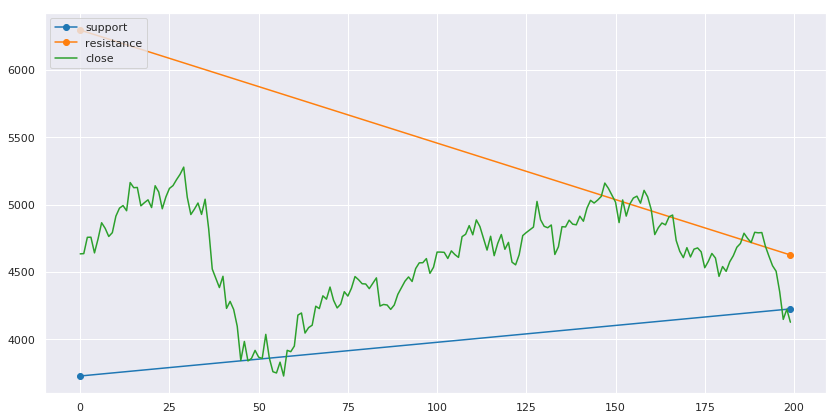

In [8]:
plt.figure(figsize=(14, 7))
x_line = [kl_tl.x[0], kl_tl.x[-1]]
y_line_support = rval_support['support'][0]
y_line_resistance = rval_resistance['resistance'][0]
plt.plot(x_line, y_line_support, 'o-', label='support')
plt.plot(x_line, y_line_resistance, 'o-', label='resistance')
plt.plot(kl_tl.x, kl_tl.tl, label='close')
plt.legend(loc=2)
plt.show()